# M3 - WEEK 5 | PROJECT: Make your data shine!

Working on The Metropolitan Museum of Art Open Access.

# Step One : Warming up

#### we should dexcribe about our analysis and scope of this. 

We want to clean data for analysing for questions as follow:

1) Which top 10 Department have the highest number amoung all Artists in the Metropolitan Museum of Art ?

2) Which top 10 Nationality have the highest number amoung all Artists in the Metropolitan Museum of Art ?

3) The number of gift which are given to the museum based on year?

4) Which top 10 Medium have the highest number amoung all Artists in the Metropolitan Museum of Art ?

5) Which top 10 Classification have the highest number amoung all Artists in the Metropolitan Museum of Art ?


Retrieving file

In [1]:
# import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlretrieve
import time

In [2]:
# Cheching running time
start_time = time.time()

In [3]:
#uploading dataset from the link which is given by ELU
url = 'https://media.githubusercontent.com/media/metmuseum/openaccess/master/MetObjects.csv'

# Save file
urlretrieve(url, 'MetObjects.csv')

# Read file into a DataFrame 
df_chunk = pd.read_csv('MetObjects.csv', sep=',', chunksize= 10000 )
dfz = pd.concat(df_chunk)
print("--- %s seconds ---" % (time.time() - start_time))

--- 32.20007300376892 seconds ---


In [4]:
# Print the dataset head
dfz.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Period,Dynasty,...,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN


In [5]:
#Checking the shape of dataset
dfz.shape

(495103, 44)

In [6]:
#Check the information of our dtaset
dfz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495103 entries, 0 to 495102
Data columns (total 44 columns):
Object Number              495103 non-null object
Is Highlight               495103 non-null bool
Is Public Domain           495103 non-null bool
Object ID                  495103 non-null int64
Department                 495103 non-null object
Object Name                490694 non-null object
Title                      463839 non-null object
Culture                    209073 non-null object
Period                     89558 non-null object
Dynasty                    23281 non-null object
Reign                      11206 non-null object
Portfolio                  22306 non-null object
Artist Role                285873 non-null object
Artist Prefix              98608 non-null object
Artist Display Name        287970 non-null object
Artist Display Bio         238338 non-null object
Artist Suffix              12261 non-null object
Artist Alpha Sort          287935 non-null object


In [7]:
#Checking the feature of 'integer ' columns
dfz.describe()

,Object ID,Object Begin Date,Object End Date
count,495103.000000,495103.000000,495103.000000
mean,387463.309287,1313.109971,1410.841556
std,232128.271870,1651.196129,1105.834773
min,1.000000,-400000.000000,-240000.000000
25%,213611.500000,1540.000000,1598.000000
50%,375709.000000,1800.000000,1847.000000
75%,565729.500000,1900.000000,1911.000000
max,827099.000000,5000.000000,15335.000000


In [8]:
#Checking the feature of 'object ' columns
dfz.describe(include='object')

,Object Number,Department,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Artist Role,...,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Metadata Date,Repository,Tags
count,495103,495103,490694,463839,209073,89558,23281,11206,22306,285873,...,15562,7339,15978,2098,438680,25000,495103,495103,495103,265188
unique,492398,19,28372,252194,7278,1809,381,381,3282,6365,...,860,1361,373,230,1235,1441,495103,1,1,51880
top,62.635,Drawings and Prints,Print,Fragment,American,Edo period (1615–1868),Dynasty 18,reign of Amenhotep III,Les Images De Tous Les Saincts et Saintes de L...,Artist,...,Cemetery,debris,MMA excavations,Upper Sepik River,Prints,"© Walker Evans Archive, The Metropolitan Museu...",http://www.metmuseum.org/art/collection/search...,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",Men|Portraits|Baseball|Athletes
freq,4,178975,102530,7011,28407,8882,7156,2730,601,115071,...,1925,416,2387,361,77063,9204,1,495103,495103,9704


In [9]:
#Checking type of data
dfz.dtypes

Object Number              object
Is Highlight                 bool
Is Public Domain             bool
Object ID                   int64
Department                 object
Object Name                object
Title                      object
Culture                    object
Period                     object
Dynasty                    object
Reign                      object
Portfolio                  object
Artist Role                object
Artist Prefix              object
Artist Display Name        object
Artist Display Bio         object
Artist Suffix              object
Artist Alpha Sort          object
Artist Nationality         object
Artist Begin Date          object
Artist End Date            object
Object Date                object
Object Begin Date           int64
Object End Date             int64
Medium                     object
Dimensions                 object
Credit Line                object
Geography Type             object
City                       object
State         

In [10]:
#cheking missing value

missing_values_count = dfz.isnull().sum()* 100 / len(dfz)

# look at the missing points in the first ten columns
missing_values_count[:].sort_values()


Object Number               0.000000
Is Highlight                0.000000
Is Public Domain            0.000000
Object ID                   0.000000
Department                  0.000000
Metadata Date               0.000000
Link Resource               0.000000
Object End Date             0.000000
Object Begin Date           0.000000
Repository                  0.000000
Credit Line                 0.159563
Object Name                 0.890522
Medium                      1.534428
Object Date                 3.036944
Title                       6.314646
Classification             11.396215
Dimensions                 15.411945
Artist Display Name        41.836345
Artist Alpha Sort          41.843414
Artist Role                42.259893
Tags                       46.437812
Artist Begin Date          51.312555
Artist Display Bio         51.860926
Artist End Date            51.883951
Culture                    57.771817
Artist Nationality         60.935199
Artist Prefix              80.083336
P

In [11]:
#just double check the percentage of missing value in the whole dataset
total_cells = np.product(dfz.shape)
total_missing = missing_values_count.sum()

# percent of data that is missing
(total_missing/total_cells) * 100

0.009970978727101289

In [12]:
#Dropping missing value upper than 80%
df2=dfz.drop(['River','State','Locus','County','Reign','Artist Suffix','Locale','Excavation','Subregion','Portfolio','Dynasty',
              'Rights and Reproduction','Region','City','Geography Type','Country','Period'],axis=1)

In [13]:
#Drop any repetation by rows
duplicateRowsDF = dfz[dfz.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [Object Number, Is Highlight, Is Public Domain, Object ID, Department, Object Name, Title, Culture, Period, Dynasty, Reign, Portfolio, Artist Role, Artist Prefix, Artist Display Name, Artist Display Bio, Artist Suffix, Artist Alpha Sort, Artist Nationality, Artist Begin Date, Artist End Date, Object Date, Object Begin Date, Object End Date, Medium, Dimensions, Credit Line, Geography Type, City, State, County, Country, Region, Subregion, Locale, Locus, Excavation, River, Classification, Rights and Reproduction, Link Resource, Metadata Date, Repository, Tags]
Index: []

[0 rows x 44 columns]


In [14]:
df2.head()

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Prefix,...,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Metadata Date,Repository,Tags
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,Maker,NaN,...,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/1,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,NaN,...,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Metal,http://www.metmuseum.org/art/collection/search/2,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/3,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/4,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/5,5/27/2019 8:00:01 AM,"Metropolitan Museum of Art, New York, NY",NaN


In [15]:
#change the type of date into datetime and save it in new column by name 'Date'
df2['Date']=pd.to_datetime(df2['Metadata Date'])


In [16]:
# Delete the old date column
df2=df2.drop('Metadata Date',axis=1)

In [17]:
#Change the type of ' object ' columns to Categories
for col in ['Department', 'Object Name', 'Title', 'Culture', 'Artist Role', 'Artist Prefix', 'Artist Display Name', 
            'Artist Display Bio', 'Artist Alpha Sort', 'Artist Nationality', 'Artist Begin Date', 'Artist End Date', 
            'Object Date', 'Medium', 'Dimensions', 'Credit Line', 'Classification',
            'Link Resource', 'Repository', 'Tags']:
    df2[col] = df2[col].astype('category')
    


# Analysing dataset and Plotting


#  Which top 10 Department have the highest number amoung all Artists in the Metropolitan Museum of Art ?

In [18]:
#just checking the number of frequency in this column
df2.Department.value_counts()

Drawings and Prints                          178975
European Sculpture and Decorative Arts        43024
Photographs                                   39059
Asian Art                                     37783
Greek and Roman Art                           33716
Costume Institute                             31335
Egyptian Art                                  27911
American Decorative Arts                      18573
Islamic Art                                   15775
Modern and Contemporary Art                   14784
Arms and Armor                                13584
Arts of Africa, Oceania, and the Americas     13053
Medieval Art                                   7504
Ancient Near Eastern Art                       6325
Musical Instruments                            5321
European Paintings                             2908
The Cloisters                                  2629
Robert Lehman Collection                       2586
The Libraries                                   258
Name: Depart

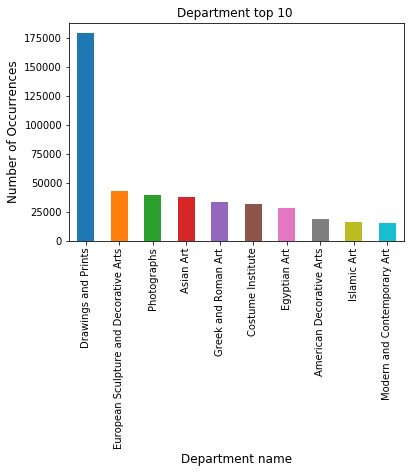

In [19]:
#Plot the top 10 Department by bar chart
df2['Department'].value_counts()[:10].plot(kind='bar')
plt.title('Department top 10 ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Department name', fontsize=12)
plt.show()

By looking at this graph, we can see the highest Department is 'Drawing and Prints' which has almost more than 175000 number of occurances among all art. The other group with a small differences from each other have the place in top2 to top10. It shows the
Drawing and Prints's has the most popularity among all departments.

# Which top 10 Nationality have the highest number amoung all Artists in the Metropolitan Museum of Art ?

We have a column by name 'Artist Nationality' and we have anothe column called 'Artist Display Bio' which contain country of artist as well, so for this analysis we use both column to improve the validation of out result.

In [20]:
#Check the information which included in this column
df2['Artist Display Bio'].tail(100)

495003                                                  NaN
495004                  British, Huntingdon 1799–1856 Paris
495005                          British, active ca. 1835–45
495006                                                  NaN
495007                                                  NaN
495008                                                  NaN
495009                                                  NaN
495010                                                  NaN
495011                                                  NaN
495012                                                  NaN
495013                                                  NaN
495014                                                  NaN
495015                                                  NaN
495016                                                  NaN
495017                                                  NaN
495018                                                  NaN
495019                                  

In [21]:
#seperate the country from Artist Display Bio column and save it itself.
df2['Artist Display Bio']= df2['Artist Display Bio'].apply(lambda x: x.split(',')[0])

In [22]:
#Check the new column
df2['Artist Display Bio'].tail(100)

495003       –1738
495004     British
495005     British
495006       –1738
495007       –1738
495008       –1738
495009       –1738
495010       –1738
495011       –1738
495012       –1738
495013       –1738
495014       –1738
495015       –1738
495016       –1738
495017       –1738
495018       –1738
495019       –1738
495020       –1738
495021       –1738
495022       –1738
495023       –1738
495024       –1738
495025       –1738
495026       –1738
495027       –1738
495028       –1738
495029       –1738
495030       –1738
495031       –1738
495032       –1738
            ...   
495073     British
495074     British
495075     British
495076    American
495077     British
495078       –1738
495079       –1738
495080       –1738
495081       –1738
495082       –1738
495083       –1738
495084       –1738
495085     British
495086    American
495087     British
495088    American
495089     British
495090     British
495091     British
495092    American
495093    American
495094    Am

This code change the Nan value to the number -1738, we should change this to nan again for underestadibility!

In [23]:
#replace the -1738 with Nan for reduce mistake in analysis.
df2.replace(-1738, np.nan)

,Object Number,Is Highlight,Is Public Domain,Object ID,Department,Object Name,Title,Culture,Artist Role,Artist Prefix,...,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Classification,Link Resource,Repository,Tags,Date
0,1979.486.1,False,False,1,American Decorative Arts,Coin,One-dollar Liberty Head Coin,NaN,Maker,NaN,...,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/1,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
1,1980.264.5,False,False,2,American Decorative Arts,Coin,Ten-dollar Liberty Head Coin,NaN,Maker,NaN,...,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",Metal,http://www.metmuseum.org/art/collection/search/2,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
2,67.265.9,False,False,3,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/3,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
3,67.265.10,False,False,4,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/4,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
4,67.265.11,False,False,5,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/5,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
5,67.265.12,False,False,6,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/6,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
6,67.265.13,False,False,7,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/7,"Metropolitan Museum of Art, New York, NY",Birds|Coins,2019-05-27 08:00:01
7,67.265.14,False,False,8,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/8,"Metropolitan Museum of Art, New York, NY",Inscriptions|Men|Profiles|Coins,2019-05-27 08:00:01
8,67.265.15,False,False,9,American Decorative Arts,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,...,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love, Jr., 1967",Metal,http://www.metmuseum.org/art/collection/search/9,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01
9,1979.486.3,False,False,10,American Decorative Arts,Coin,Two-and-a-half-dollar Indian Head Coin,NaN,Maker,NaN,...,1912,1912,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",Metal,http://www.metmuseum.org/art/collection/search/10,"Metropolitan Museum of Art, New York, NY",NaN,2019-05-27 08:00:01


In [24]:
#print the top 10 country to check for format and if it needs cleaning
print(df2['Artist Nationality'].value_counts()[0:10])

we need to keep the first name because for example Italian artist are counted in two different format and we need to keep first country name due to repetation.

In [25]:
#just seperatig information by '|' and keep the first one to reduce repetation 
df2['Artist Nationality']= df2['Artist Nationality'].apply(lambda x: x.split('|')[0])

American                60695
French                  18645
Italian                 12674
French|French            9139
British                  8539
American|American        7435
German                   7360
Japanese                 6249
Italian|Italian          4543
French|French|French     4138
Name: Artist Nationality, dtype: int64


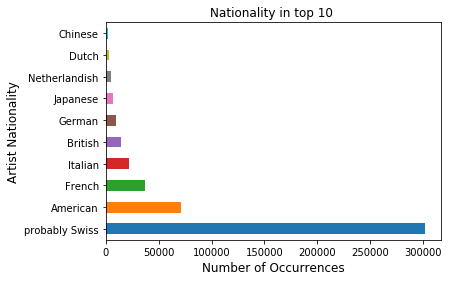

In [26]:
#plotting the top 10 country 
df2['Artist Nationality'].value_counts()[0:10].plot(kind='barh')
plt.title('Nationality in top 10 ')
plt.ylabel('Artist Nationality', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.show()

In this plot we can see the 'probably Swiss' is the highest one and it seems a little strange, So , from the last code we have the same information as this and we can check these two with each other and find the real information.

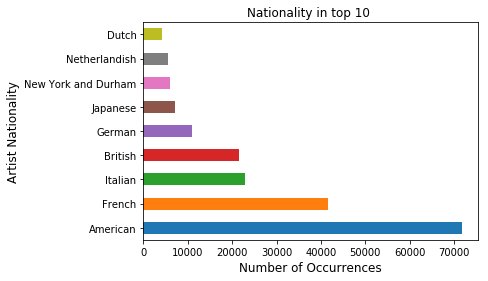

In [27]:
df2['Artist Display Bio'].value_counts()[1:10].plot(kind='barh')
plt.title('Nationality in top 10 ')
plt.ylabel('Artist Nationality', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.show()

Comparing this plot with the Nationality in top 10 , we can recognise that 'probably Swiss' is not the vvalid information and we can delete it.

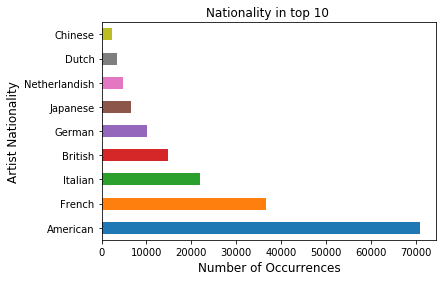

In [28]:
#Delete the probably Swiss and plot top 10 country again
df2['Artist Nationality'].value_counts()[1:10].plot(kind='barh')
plt.title('Nationality in top 10 ')
plt.ylabel('Artist Nationality', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.show()

After deleting the probably Swiss, this plot is more valid for us! And the American is the highest country.

#  The number of gift which are given to the museum based on year?

For answer this question we need to seperate the 'Credit Line' in two new column and see what is the answer!

In [29]:
#for analysing how many gift are given to the Museum, we need to seperate the 'Credit Line' column to two 
#and extract out new informatin in seperated column. We just extract year of gift as new column
df2['year of gift']=df2['Credit Line'].str[-4:]

In [30]:
#for analysing how many gift are given to the Museum, we need to seperate the 'Credit Line' column to two 
#and extract out new informatin in seperated column. We just extract name of the person who gave the gift to Museum as new column
df2['Gift to Museum']= df2['Credit Line'].apply(lambda x: x.split(',')[0])
#check the head
df2['Gift to Museum'].head()

0    Gift of Heinz L. Stoppelmann
1    Gift of Heinz L. Stoppelmann
2          Gift of C. Ruxton Love
3          Gift of C. Ruxton Love
4          Gift of C. Ruxton Love
Name: Gift to Museum, dtype: object

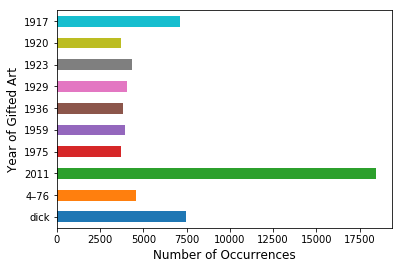

In [31]:
#counting the number of gift which are given to the museum by condition which is being public.
dfpublic=df2[df2['Is Public Domain']== True]
df_select = dfpublic['year of gift'].value_counts()[0:10].sort_index(ascending=False)
df_select.plot(kind='barh')
plt.ylabel('Year of Gifted Art', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.show()

In this plot we can see we are facing two anamaly categories in year and we need to clean these data again to be more valid.

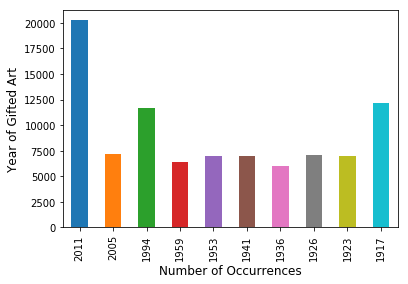

In [32]:
# in the last plot we can see the anomaly categories appear in the year category so for this purpose we should delete these two
#anamoly and find the valid yearsin top 10
dfff=df2['year of gift'].replace(['4-76','dick'], np.nan)
mm=dfff.value_counts()[0:10].sort_index(ascending=False)
mm.plot(kind='bar')
plt.ylabel('Year of Gifted Art', fontsize=12)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.show()

We found the number of gifted art to the museum and we sorted by year and we can 2011 has the highest number in this plot!

# Which top 10 Medium have the highest number amoung all Artists in the Metropolitan Museum of Art ?


Medium is the form of art that is used. Terracotta is in number of art items te biggest.

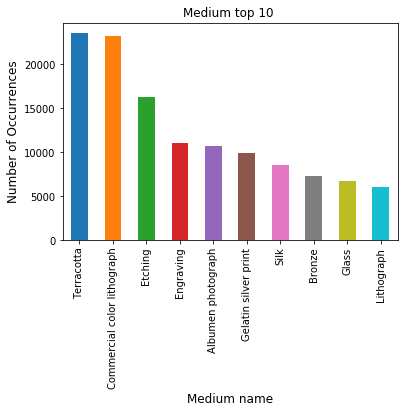

In [33]:
#show the top 10 Medium by bar chart
df2['Medium'].value_counts()[:10].plot(kind='bar')
plt.title('Medium top 10 ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Medium name', fontsize=12)
plt.show()

In this plot we can find out about the information for 'Meduim' column which include the type and material that artist used it for their art. The highest ones are 'Terracotta ', 'Commercial color lithograph'!

# Which top 10 Classification have the highest number amoung all Artists in the Metropolitan Museum of Art ?

For this regard we need to count the number of occurence per class in the dataset and compare them and plot the top 10.

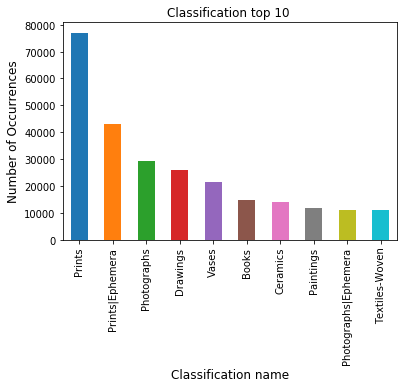

In [34]:
#show the top 10 Classification  by bar chart
df2['Classification'].value_counts()[:10].plot(kind='bar')
plt.title('Classification top 10 ')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Classification name', fontsize=12)
plt.show()

The plot reveals that the most popular classification is prints!